### **WEEK 2 - Perform initial exploration to understand the dataset**

**EDA - Exploratory Data Analysis**
*   What do you want to acheive from your dataset ?
*   What is your data and its different types ?
*   Is there any outlier in your data ?
*   Check and treat missing values ?
*   How do you get more out of your data ?


In [ ]:
# Importing necessary libraries for data analysis and visualization

# pandas: used for data manipulation and analysis, especially with tabular data (DataFrames)
import pandas as pd

# numpy: used for numerical operations, arrays, and mathematical functions
import numpy as np

# matplotlib.pyplot: used for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# seaborn: statistical data visualization library built on matplotlib, simplifies plotting and enhances aesthetics
import seaborn as sns

# MACHINE LEARNING LIBRARBIES

# data splitting & preprocessing
from sklearn.model_selection import train_test_split # train_test_split: splits dataset into training and testing subsets
from sklearn.preprocessing import StandardScaler # StandardScaler: standardizes features by removing the mean and scaling to unit variance

# machine learning models
from sklearn.linear_model import LinearRegression  # LinearRegression: basic regression model for continuous target prediction
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor: ensemble-based regression using multiple decision trees
import xgboost as xgb # XGBRegressor: gradient boosting regression model (efficient, high-performance)

# model evaluation metrics
from sklearn.metrics import (
    mean_squared_error,          # MSE: average squared difference between predicted and actual values
    mean_squared_log_error,      # MSLE: log-scaled version of MSE, penalizes underestimation less harshly
    r2_score,                    # R²: coefficient of determination, measures proportion of variance explained
    mean_absolute_error          # MAE: average absolute difference between predicted and actual values
)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [ ]:
# import dataset
from google.colab import files

uploaded = files.upload()
realEstate_df = pd.read_csv("real_estate_datasetCOPY.csv") # Reads csv file

In [ ]:
# first 5 rows
realEstate_df.head()

In [ ]:
# last 5 rows
realEstate_df.tail()

In [ ]:
# random row
realEstate_df.sample()

In [ ]:
# rows & columns
realEstate_df.shape

In [ ]:
# columns
realEstate_df.columns

In [ ]:
# Summary of dataframe
realEstate_df.info()

In [ ]:
# Data types of each column
realEstate_df.dtypes

In [ ]:
# Summary statistics (numerical columns)
realEstate_df.describe()

In [ ]:
# Count unique values in each column
realEstate_df.nunique()

**Selecting & Filtering Data**

In [ ]:
# select one column
realEstate_df["ID"]

# First 5 rows, first 3 columns
realEstate_df.iloc[0:3, 0:5]

# Multiple columns
realEstate_df[["ID", "Square_Feet"]]

# Multiple conditions
realEstate_df[(realEstate_df["Num_Bedrooms"] == 5) & (realEstate_df["Num_Floors"] == 1) ]

**Modifying & Creating Columns**

In [ ]:
# inorder to prevent the dataset from being alerted; create a copy
modify_df = realEstate_df.copy()

# Create new column
modify_df["Total_Rooms"] = realEstate_df["Num_Bedrooms"] + realEstate_df["Num_Bathrooms"]

# Transform column
modify_df["Price_in_thousands"] = modify_df["Price"] /1000

# Apply function
modify_df["lambda_col"] = modify_df["Garage_Size"].apply(lambda x: x * 2)

# Rename column
modify_df.rename(columns={"Distance_to_Center":"Proximity_to_CBD"}, inplace=True)

# Drop columns
modify_df.drop(columns=["Square_Feet"], inplace=True)

# display the modifications
modify_df

**Grouping & Aggregation**

In [ ]:
# Pivot table
#df.pivot_table(values="sales", index="region", columns="year", aggfunc="sum")

# Group by and calculate mean
realEstate_df.groupby("Garage_Size")["Price"].mean()

# Multiple aggregations
realEstate_df.groupby(["Num_Bedrooms", "Num_Bathrooms"]).agg({"Price": ["mean", "sum"]})

**Sorting & Unique Values**

In [ ]:
# Sort by "column_name" descending
realEstate_df.sort_values(by="Location_Score", ascending=False)

# Get unique values in a column
realEstate_df["Num_Bathrooms"].unique()

# Count occurrences of unique values
realEstate_df["Num_Bathrooms"].value_counts()

**Basic NumPy Operations**

In [ ]:
# Mean salary
mean = np.mean(realEstate_df["Price"])

# Median salary
median = np.median(realEstate_df["Num_Bathrooms"])

# Standard deviation
sd = np.std(realEstate_df["Price"])

# 80th percentile
percentile = np.percentile(realEstate_df["Price"], 80)

print(f"\nMean: {mean} \nMedian: {median} \nStandard deviation: {sd} \nPercentile: {percentile}")


**Converting Data Types**

In [ ]:
# copy of df inorder to avoid alerting original dataset
convert_df = realEstate_df.copy()

# Convert column to integer
convert_df["Price"] = realEstate_df["Price"].astype(int)

# Convert to datetime
convert_df["Year_Built"] = pd.to_datetime(realEstate_df["Year_Built"])

# convert_df["year"] = realEstate_df["date"].dt.year # Extract year from date
# convert_df["month"] = realEstate_df["date"].dt.month # Extract month

convert_df

convert_df["Price"].info()

**Basic Visualization**

In [ ]:
# HISTOGRAM of a column; visualizes the distribution of a single numerical variable
# HISTOGRAM -- using matplotlib
plt.figure(figsize=(12,6))
plt.hist(realEstate_df["Price"], color= "Green", bins=20, edgecolor="black");
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Number of houses")
plt.show()

In [ ]:
# LINE PLOT
realEstate_df["Square_Feet"].max()

In [ ]:
# HISTOGRAM -- using sns

plt.figure(figsize=(12,6))
sns.histplot(realEstate_df["Price"], color= "Green", bins=20, edgecolor="black", kde=True);
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Number of houses")
#sns.show()

In [ ]:
# BOX PLOT -- using matplotlib
realEstate_df["Price"].plot(kind="box", vert=True, figsize=(12,6), grid=True, color="blue")
plt.title("Boxplot of House Prices")
plt.show()


In [ ]:
# BOX PLOT -- using sns
plt.figure(figsize=(12,6)) # larger figure for clarity
sns.boxplot(x=realEstate_df["Price"]);
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # optional add grid
plt.show()


In [ ]:
# BOXPLOT -- matplotlib
# Boxplot of all numerical columns
plt.figure(figsize=(12,6))  # larger figure

# Boxplot for all numerical columns
realEstate_df.plot(kind="box", vert=True, figsize=(12,6), grid=True, color="blue")

plt.title("Boxplot of all Numerical Columns")  # chart title
plt.xlabel("Columns")  # x-axis label
plt.ylabel("Values")   # y-axis label
plt.ylim(0, 550)  # y-axis range for better visualization
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded

plt.show()

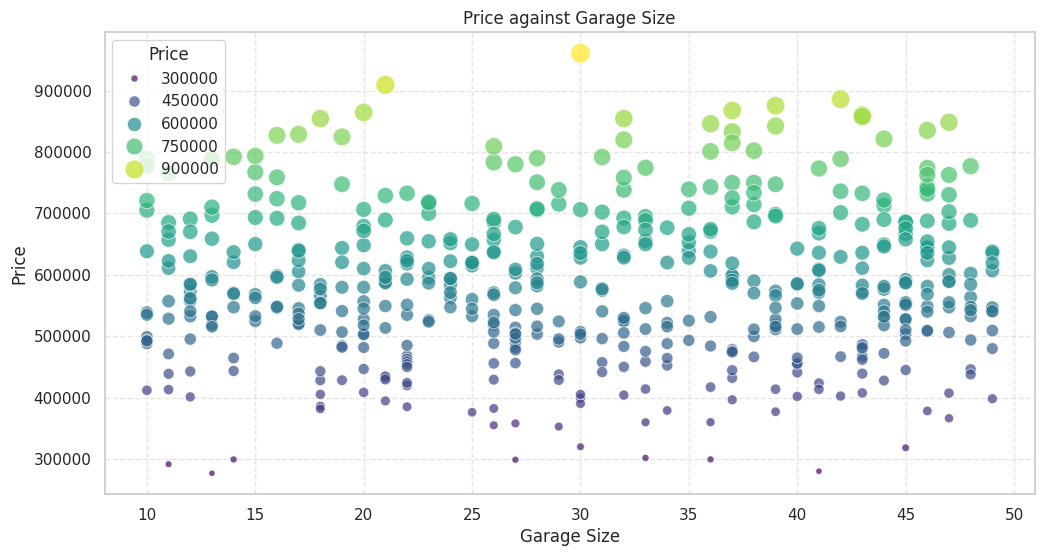

In [ ]:
# SCATTER PLOT
# 2D data visualization that uses dots to represent the values obtained for two different variables
# one plotted along the X-axis and the other plotted along the y-axis.
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="Garage_Size",
    y="Price",
    data=realEstate_df,
    hue="Price",        # color by Price
    palette="viridis",  # choose a color palette
    size="Price",       # optional: scale marker size by Price
    sizes=(20, 200),    # marker size range
    alpha=0.7           # make points slightly transparent
)

plt.title("Price against Garage Size")
plt.xlabel("Garage Size")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5) # optional: grid

plt.show()

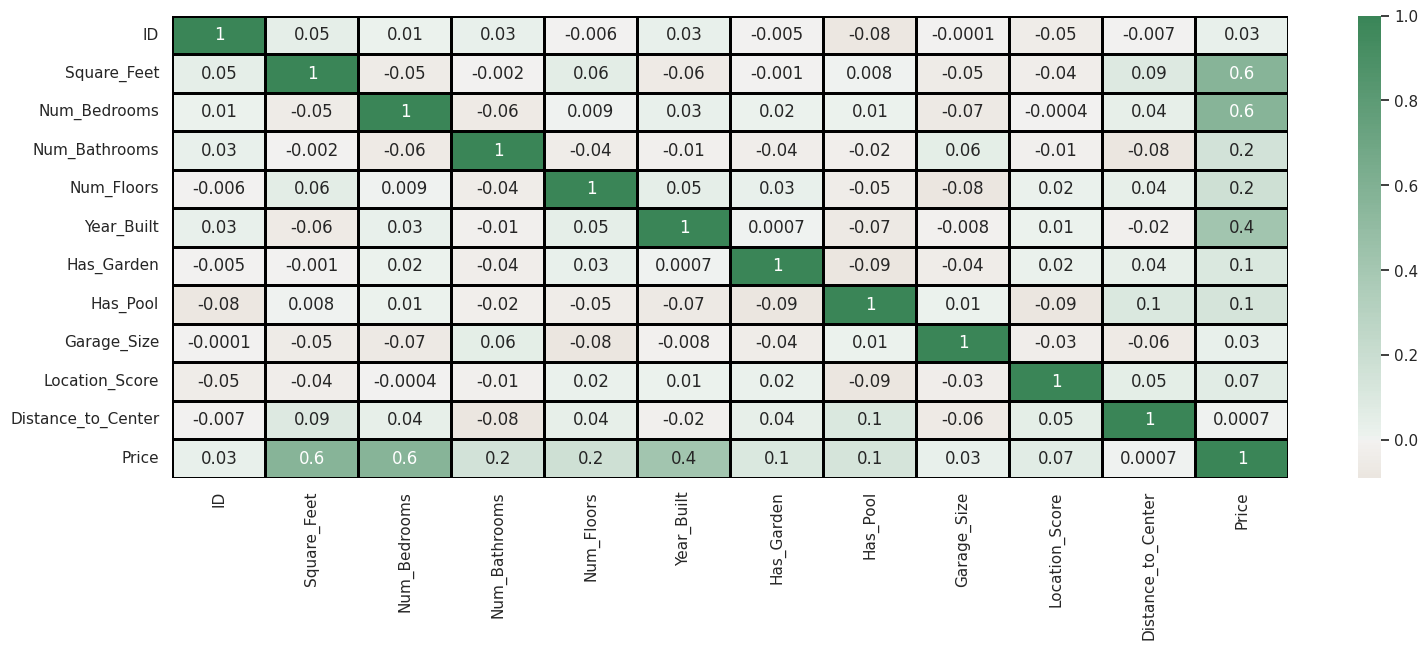

In [ ]:
# CORRELATION MATRIX
realEstateCorr = realEstate_df.corr()

plt.figure(figsize=(18,6))

#Use sns.heatmap() --> heatmap to visualize the correlation matrix
axis_corr = sns.heatmap(
realEstateCorr,
annot=True,
fmt='.1g',
vmax=1,
center=0,
cmap=sns.diverging_palette(50, 500, n=500), # n=500 means that we want 500 types of color in the same color palette.
linewidths=1,
linecolor='black'
)

plt.show()


In [ ]:

# numeric_features; columns with numerical data types like int, float
numeric_features = realEstate_df.select_dtypes(include=[np.number]) # These will be used for calculating correlations
correlation = numeric_features.corr()
print(correlation['Price'].sort_values(ascending = False), '\n')

Price                 1.000000
Num_Bedrooms          0.563973
Square_Feet           0.558604
Year_Built            0.418293
Num_Floors            0.177435
Num_Bathrooms         0.156689
Has_Pool              0.136579
Has_Garden            0.109196
Location_Score        0.071326
Garage_Size           0.032100
ID                    0.031774
Distance_to_Center    0.000730
Name: Price, dtype: float64 



**WEEK 3 - Data Cleaning & Feature Engineering**

*   Handling Duplicates
*   Handling Missing Values
*   Handling Outliers

****Creating Fictitious Dataset since the original one doesn't have any missing values or duplicates****

In [ ]:
# Sample from your dataset
df_practice = realEstate_df.sample(10, random_state=42).copy()

# Randomly set some entries to NaN
df_practice.loc[0, 'Price'] = np.nan
df_practice.loc[1, 'Square_Feet'] = np.nan
df_practice.loc[2, 'Has_Pool'] = np.nan
df_practice.loc[3, 'Num_Bedrooms'] = np.nan

# Introduce duplicate rows
df_practice = pd.concat([df_practice, df_practice.iloc[0:3]], ignore_index=True)

# Shuffle rows
df_practice = df_practice.sample(frac=1, random_state=1).reset_index(drop=True)

# Check the (new)practice dataset
df_practice

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,156.0,110.513818,1.0,3.0,3.0,1920.0,1.0,1.0,37.0,8.888874,9.230459,478489.2990
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125.0,106.983791,5.0,1.0,3.0,1954.0,0.0,0.0,39.0,2.755479,8.299424,573486.1458
3,375.0,67.797162,4.0,1.0,1.0,1959.0,1.0,1.0,15.0,7.394082,17.392122,532377.5802
4,378.0,55.817984,3.0,1.0,2.0,1920.0,0.0,1.0,26.0,4.980404,18.646455,354991.3492
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,105.0,276.891618,4.0,1.0,1.0,1943.0,1.0,1.0,47.0,1.778881,10.421464,730197.4806
7,74.0,253.865357,3.0,2.0,2.0,1972.0,1.0,0.0,41.0,4.589635,14.861631,667693.0003
8,362.0,210.822055,2.0,1.0,2.0,1989.0,0.0,1.0,37.0,0.066821,13.161652,591058.7089
9,362.0,210.822055,2.0,1.0,2.0,1989.0,0.0,1.0,37.0,0.066821,13.161652,591058.7089


**Merging & Joining Data**

In [ ]:
# splits dfs from main df --> wont be able to see the difference ADD ROWS ROWS df1 & df2 - respectively, inorder to see the difference

# 1st DataFrame (basic info)
df1 = df_practice[["Price", "Square_Feet", "Num_Bedrooms", "Num_Bathrooms", "Num_Floors"]].copy()
df1["id"] = df1.index + 1  # start IDs from 1

# Remove the last row from df1 to create a missing ID scenario
df1 = df1.iloc[:-1]

# 2nd DataFrame (amenities & location)
df2 = df_practice[["Has_Garden", "Has_Pool", "Garage_Size", "Location_Score", "Distance_to_Center"]].copy()
df2["id"] = df2.index + 1  # same sequential IDs

# Add an extra row to df2 that doesn't exist in df1
extra_row = pd.DataFrame({
    "Has_Garden": ["Yes"],
    "Has_Pool": ["No"],
    "Garage_Size": [2],
    "Location_Score": [8.5],
    "Distance_to_Center": [3.0],
    "id": [999]  # ID not present in df1
})
df2 = pd.concat([df2, extra_row], ignore_index=True)

# Print DataFrames
print("DataFrame 1 - Basic Info:")
print(df1.tail())

print("\nDataFrame 2 - Amenities & Location:")
print(df2.tail())

# Perform joins
inner_join = df1.merge(df2, on="id", how="inner")
left_join = df1.merge(df2, on="id", how="left")
right_join = df1.merge(df2, on="id", how="right")
outer_join = df1.merge(df2, on="id", how="outer")


DataFrame 1 - Basic Info:
          Price  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  id
11  667693.0003   253.865357           3.0            2.0         2.0  12
12  739265.7365   244.286729           4.0            3.0         3.0  13
13  529467.5993    68.637661           2.0            2.0         2.0  14
14          NaN          NaN           NaN            NaN         NaN  15
15          NaN          NaN           NaN            NaN         NaN  16

DataFrame 2 - Amenities & Location:
   Has_Garden Has_Pool  Garage_Size  Location_Score  Distance_to_Center   id
13        1.0      1.0         44.0        4.982360            5.617639   14
14        NaN      NaN          NaN             NaN                 NaN   15
15        NaN      NaN          NaN             NaN                 NaN   16
16        0.0      0.0         13.0        8.183696           17.879704   17
17        Yes       No          2.0        8.500000            3.000000  999


In [ ]:
# INNER JOIN: properties present in both

# Show the last few rows to see differences
print("\nInner Join:")
print(inner_join.tail())


Inner Join:
          Price  Square_Feet  ...  Location_Score  Distance_to_Center
11  667693.0003   253.865357  ...        4.589635           14.861631
12  739265.7365   244.286729  ...        4.087773            6.720141
13  529467.5993    68.637661  ...        4.982360            5.617639
14          NaN          NaN  ...             NaN                 NaN
15          NaN          NaN  ...             NaN                 NaN

[5 rows x 11 columns]


In [ ]:
# LEFT JOIN: all from df1

print("\nLeft Join:")
print(left_join.tail())


Left Join:
          Price  Square_Feet  ...  Location_Score  Distance_to_Center
11  667693.0003   253.865357  ...        4.589635           14.861631
12  739265.7365   244.286729  ...        4.087773            6.720141
13  529467.5993    68.637661  ...        4.982360            5.617639
14          NaN          NaN  ...             NaN                 NaN
15          NaN          NaN  ...             NaN                 NaN

[5 rows x 11 columns]


In [ ]:
# RIGHT JOIN: all from df2

print("\nRight Join:")
print(right_join.tail())


Right Join:
          Price  Square_Feet  ...  Location_Score  Distance_to_Center
13  529467.5993    68.637661  ...        4.982360            5.617639
14          NaN          NaN  ...             NaN                 NaN
15          NaN          NaN  ...             NaN                 NaN
16          NaN          NaN  ...        8.183696           17.879704
17          NaN          NaN  ...        8.500000            3.000000

[5 rows x 11 columns]


In [ ]:
# OUTER JOIN: all from both

print("\nOuter Join:")
print(outer_join.tail())


Outer Join:
          Price  Square_Feet  ...  Location_Score  Distance_to_Center
13  529467.5993    68.637661  ...        4.982360            5.617639
14          NaN          NaN  ...             NaN                 NaN
15          NaN          NaN  ...             NaN                 NaN
16          NaN          NaN  ...        8.183696           17.879704
17          NaN          NaN  ...        8.500000            3.000000

[5 rows x 11 columns]


**Handling Missing Values**

<Axes: >

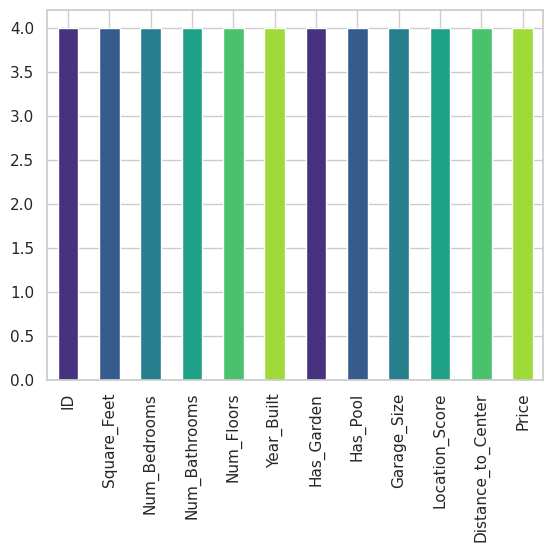

In [ ]:
# check and plot the missing values
missing = df_practice.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
colors = sns.color_palette("viridis")  # viridis palette
missing.plot.bar(color=colors)

In [ ]:
#check for number of missing values
print(f"\nMissing values per column: { df_practice.isnull().sum() }")


Missing values per column: ID                    4
Square_Feet           4
Num_Bedrooms          4
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              4
Garage_Size           4
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64


In [ ]:
# 1. Removing ALL missing values

# Check missing values per column
print("\nMissing values per column:")
print(df_practice.isnull().sum())

# Drop rows with missing values
df_dropna = df_practice.dropna()

# Check shape to see how many rows were removed
# print("\nOriginal dataset shape:", df_practice.shape)
# print("After dropping rows with missing values:", df_dropna.shape)

# Check missing values after dropping
print("\nMissing values after dropping:")
print(df_dropna.isnull().sum())




Missing values per column:
ID                    4
Square_Feet           4
Num_Bedrooms          4
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              4
Garage_Size           4
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64

Missing values after dropping:
ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


In [ ]:
# 2. Fill missing values with specific values
# Good Practice:  to fill missing values per column

df_clean = df_practice.copy()  # so it doesnt alter values in the original df

# Fill missing values in 'Has_Pool' column
df_clean['Has_Pool'] = df_clean['Has_Pool'].fillna("Nan")


# display  missing values in original df
print("\nMissing values in Original DataFrame:")
print(df_practice.isnull().sum())

# Check missing values(specifically 'Has_Pool' column) in new df
print("\nMissing values in new DataFrame:")
print(df_clean.isnull().sum())


Missing values in Original DataFrame:
ID                    4
Square_Feet           4
Num_Bedrooms          4
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              4
Garage_Size           4
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64

Missing values in new DataFrame:
ID                    4
Square_Feet           4
Num_Bedrooms          4
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              0
Garage_Size           4
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64


In [ ]:
# 3. Fill missing numerical values with mean/median
# mean/median depends on outliers (mean = larger outliers)

df_clean = df_practice.copy()  # so it doesnt alert values in the original df

# clean the missing values in 'Garage_Size' and 'Num_Bedrooms' column
df_clean["Garage_Size"].fillna(df_practice["Garage_Size"].mean(),inplace=True)
df_clean["Num_Bedrooms"].fillna(df_practice["Num_Bedrooms"].median(),inplace=True)

# display  missing values in original df
print("\nMissing values in Original DataFrame:")
print(df_practice.isnull().sum())

# Check missing values(specifically 'Garage_Size' and 'Num_Bedrooms' column) in new df
print("\nMissing values in new DataFrame:")
print(df_clean.isnull().sum())


Missing values in Original DataFrame:
ID                    4
Square_Feet           4
Num_Bedrooms          4
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              4
Garage_Size           4
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64

Missing values in new DataFrame:
ID                    4
Square_Feet           4
Num_Bedrooms          0
Num_Bathrooms         4
Num_Floors            4
Year_Built            4
Has_Garden            4
Has_Pool              4
Garage_Size           0
Location_Score        4
Distance_to_Center    4
Price                 4
dtype: int64


**Handling Duplicates**

In [ ]:
#check for number of duplicated values
print("\nNumber of duplicate rows:", df_practice.duplicated().sum())

# Remove duplicate rows
df_clean.drop_duplicates(inplace=True)

print("\nNumber of duplicate rows:", df_clean.duplicated().sum())


Number of duplicate rows: 6

Number of duplicate rows: 0


**Handling Outliers**

Original dataset size: (500, 12)
After removing outliers: (499, 12)


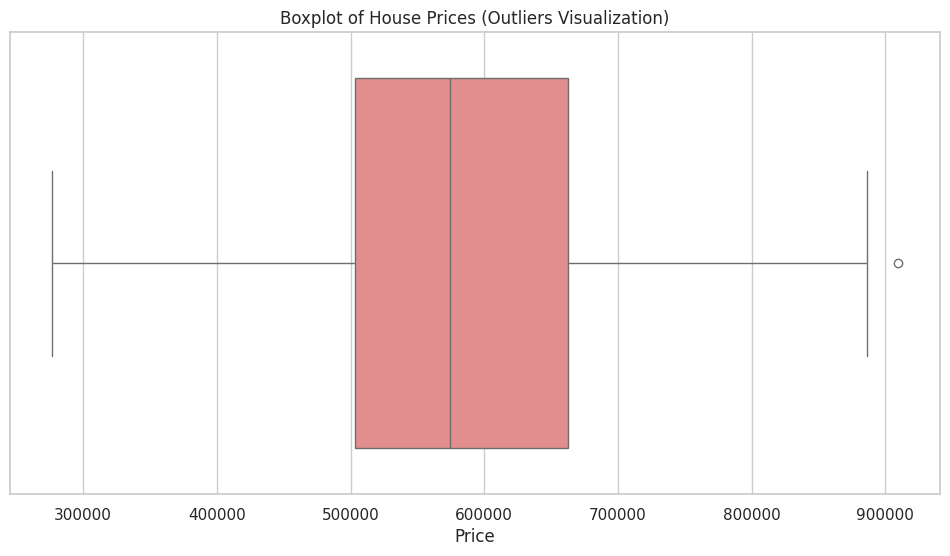

In [ ]:
# HANDLING OUTLIERS

# no need to remove all outliers - could remove useful data
# replace missing values with median

# Remove outliers using IQR method
# Calculate; Q1: 25th percentile and Q3: 75th percentile
Q1 = realEstate_df["Price"].quantile(0.25)
Q3 = realEstate_df["Price"].quantile(0.75)

# Calculate; Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter rows that are within the IQR boundaries
realEstate_df_no_outliers = realEstate_df[
    (realEstate_df["Price"] >= Q1 - 1.5*IQR) &
    (realEstate_df["Price"] <= Q3 + 1.5*IQR)
]

# Quick check
print("Original dataset size:", realEstate_df.shape)
print("After removing outliers:", realEstate_df_no_outliers.shape)

plt.figure(figsize=(12,6))  # Set figure size BEFORE plotting
sns.boxplot(x=realEstate_df_no_outliers["Price"], color='lightcoral') #changed colour
plt.title("Boxplot of House Prices (Outliers Visualization)")
plt.xlabel("Price")
plt.show()


Original dataset size: (500, 12)
After removing outliers: (500, 12)


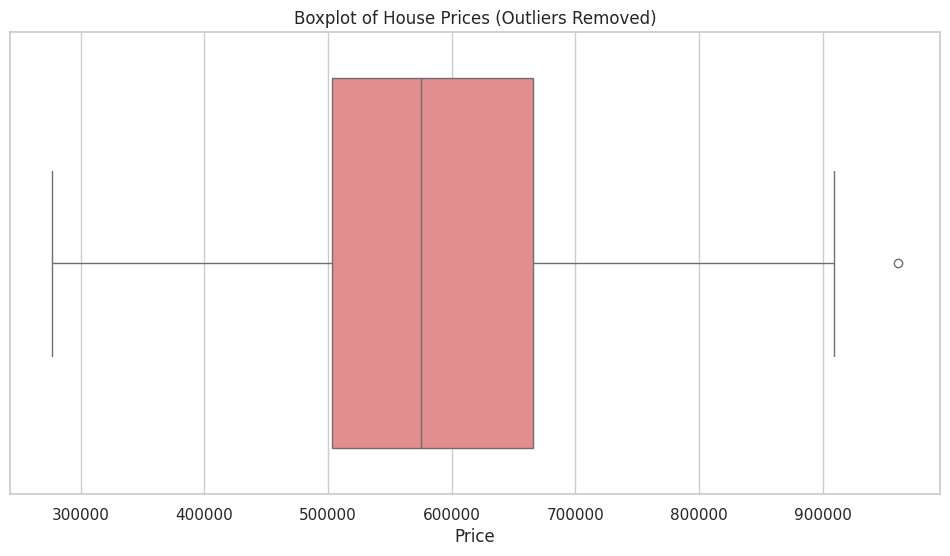

In [ ]:
# Handling outliers using IQR method
Q1 = realEstate_df["Price"].quantile(0.25)
Q3 = realEstate_df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define new upper boundary (3*IQR above Q3)
upper_boundary = Q3 + 3 * IQR

# Remove outliers and assign to new dataframe
realEstate_df_no_outliers = realEstate_df[realEstate_df["Price"] <= upper_boundary]

# Quick check
print("Original dataset size:", realEstate_df.shape)
print("After removing outliers:", realEstate_df_no_outliers.shape)

# Boxplot visualization
plt.figure(figsize=(12,6))
sns.boxplot(x="Price", data=realEstate_df_no_outliers, color='lightcoral')
plt.title("Boxplot of House Prices (Outliers Removed)")
plt.xlabel("Price")
plt.show()


**Other Visuals**

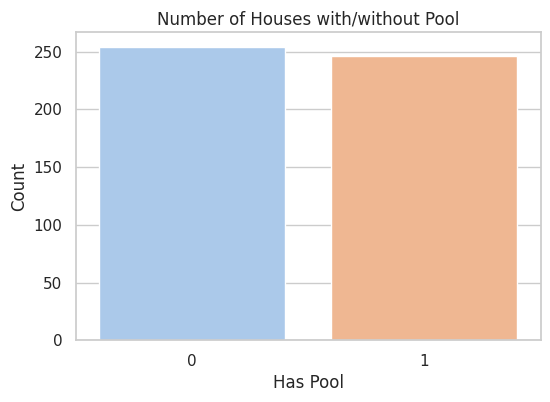

In [ ]:
# COUNT PLOT Plot

# -- visualize counts of categories
# it show the num of observations in each categorical bin (column)

# Useful --> seeing distribution of categorical variables
plt.figure(figsize=(6,4))  # (width=6 inches, height=4 inches)
# Create count plot
sns.countplot(
    x='Has_Pool',         # Column to count categories
    data=realEstate_df,   # DataFrame containing the column
    palette='pastel'      # Color palette for bars
)

# Add title and axis labels
plt.title('Number of Houses with/without Pool')  # Main title
plt.xlabel('Has Pool')  # X-axis label
plt.ylabel('Count')   # Y-axis label
plt.show() # Display the plot

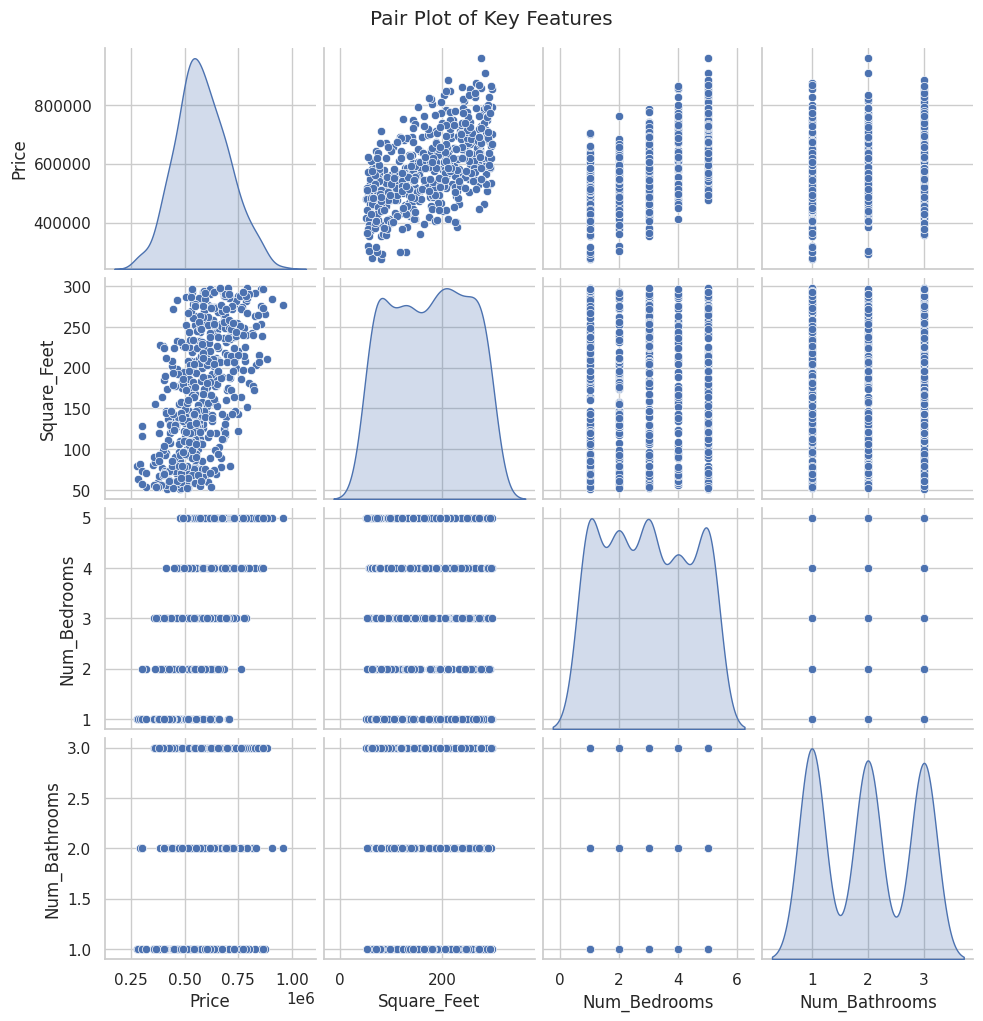

In [ ]:
# PAIR PLOT
# -- Visualizes pairwise relationships for multiple numeric columns.

# Select columns for pairwise analysis
columns_to_plot = ['Price', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms']

# Create the pair plot
sns.pairplot(
    realEstate_df[columns_to_plot],  # DataFrame containing the columns of interest
    diag_kind='kde',  # 'kde':  Kernel Density Estimate for the diagonal distribution
    height=2.5  # Height of each subplot in inches
)

# Add a main title for the figure
plt.suptitle('Pair Plot of Key Features', y=1.02)  # y=1.02; title slightly above the plot
plt.show()


**CORRELATION HEATMAP FOR FICTIOUS DATASET**

In [ ]:
# CORRELATION HEATMAP

# Create a copy of the original DataFrame to avoid modifying the original data
df_corr = df_practice.copy()

# Fill missing values in 'Has_Pool' column
df_corr['Has_Pool'] = df_corr['Has_Pool'].fillna("Nan")
df_corr['Has_Garden'] = df_corr['Has_Garden'].fillna("Nan")

# numeric_features; columns with numerical data types like int, float
numeric_features = df_corr.select_dtypes(include=[np.number]) # These will be used for calculating correlations

# categorical features; columns with object or category types
categorical_features = df_corr.select_dtypes(include=['object', 'category']) # Useful for later analysis or visualization of categorical variables

# Calculate the correlation matrix for numeric features
correlation = numeric_features.corr() # The result shows how strongly each numeric feature is correlated with others

#numeric_features = df_corr.select_dtypes(include=[np.number])


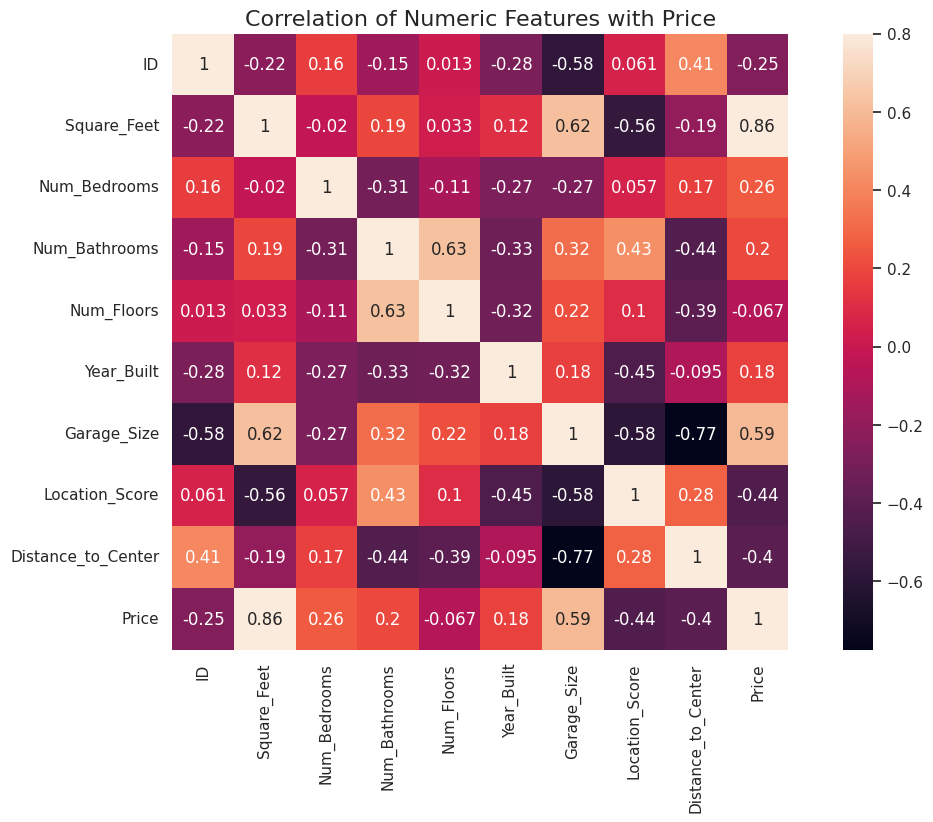

In [ ]:
#continued...
# Create a figure for the initial correlation heatmap
f, ax = plt.subplots(figsize = (14,8));

# Add a title to the heatmap
plt.title("Correlation of Numeric Features with Price",y=1, size=16);

# Plot a basic heatmap for all numeric features
sns.heatmap(correlation, square = True, vmax=0.8, annot=True); # vmax=0.8 caps the maximum color intensity for better visualization
# square=True ensures each cell is square-shaped

In [ ]:
# check the columns with strongest vs weakest correlation
correlation = numeric_features.corr()
print(correlation['Price'].sort_values(ascending = False), '\n')

Price                 1.000000
Square_Feet           0.856703
Garage_Size           0.594905
Num_Bedrooms          0.256157
Num_Bathrooms         0.202322
Year_Built            0.184721
Num_Floors           -0.067456
ID                   -0.251821
Distance_to_Center   -0.400919
Location_Score       -0.443618
Name: Price, dtype: float64 



**SAVE CLEANED DATABASE**

In [ ]:
# CONVERTING FILE TO SPECIFIC FORMAT (csv or excel)

realEstate_df.to_csv("cleaned_realEstate_data.csv", index=False) # Save DataFrame as CSV file
print("✅ Dataset cleaned and saved as 'cleaned_realEstate_data.csv'")

✅ Dataset cleaned and saved as 'cleaned_realEstate_data.csv'


**WEEK 5&6: Predictive Modeling**


**Predicitive Modeling**
- Split data into training and test sets.
- Evaluate model performance using metrics (accuracy, confusion matrix, precision, recall, F1
score)
- Train loss and test loss line graph using Matplotlib
- ML notebook with trained models and evaluation metrics.

In [ ]:
# ML libraries have been imported above

**Prepare Data**

In [ ]:
# Separate the dataset into features (X) and target (y)

X = realEstate_df.drop(["Price", "ID"], axis=1) # Features: all columns except Price & ID
y = realEstate_df["Price"] # Target: the column we want to predict ("Price")

**Split Dataset (same for all models)**

In [ ]:
# Split dataset into training and test sets

# # 80% of the data goes into the training set (X_train, y_train)
# 20% goes into the test set (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###**1st Model - LINEAR REGRESSION**

**Normalise/Scale Features**

In [ ]:
# Scale features
scaler = StandardScaler()

#transform both training and test data (using the already-fitted scaler)
X_train_scaled = scaler.fit_transform(X_train) # fit on training data only,
X_test_scaled = scaler.transform(X_test) # Use the same scaler to transform the test data

# Different features with wide range of numbers -- have to be done so that the data is uniform
# You fit the scaler only on the training data — that’s the only data allowed to “teach” the scaler what the averages and spreads are.
# But you apply that same scaler to the test data (and later to any new user inputs).

**Train Model**

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

model.fit(X_train_scaled, y_train) # Train (fit) the model on the training data

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

**Evaluate performance**

In [ ]:
# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
test_r2 = r2_score(y_test,y_test_pred)
test_mae = mean_absolute_error(y_test,y_test_pred)

# Display results
print("Training Set:")
print(" MAE:", train_mae)
print(" MSE:", train_mse)
print(" RMSE:", train_rmse)
print(" R²:", train_r2)

print("\nTest Set:")
print(" MAE:", test_mae)
print(" MSE:", test_mse)
print(" RMSE:", test_rmse)
print(" RMSLE:", test_rmsle)
print(" R²:", test_r2)

Training Set:
 MAE: 14828.964165901574
 MSE: 342547815.53983194
 RMSE: 18508.047318391855
 R²: 0.9767292313224238

Test Set:
 MAE: 16850.995609063004
 MSE: 437730359.78688246
 RMSE: 20922.00659083355
 RMSLE: 0.045475371678226226
 R²: 0.9708991391659594


In [ ]:
# ACCURACY OF MODEL
tolerance = 0.10  # 10% error tolerance
accuracy_like = np.mean(np.abs((y_test - y_test_pred) / y_test) <= tolerance)
print(f"Approximate Accuracy (within ±10%): {accuracy_like:.2%}")


Approximate Accuracy (within ±10%): 95.00%


###**Deciding whether to drop features**

- BEFORE advancing to the second model, drop less predictive features then retrain the model
- **Be cautious here — don’t drop features yet**.
    
      The correlation matrix shows some features like Garage_Size
      
      or Distance_to_Center have weak correlations with price,
      
      but correlation ≠ uselessness.

- Linear regression considers joint relationships — a weakly correlated variable might still improve prediction when combined with others.

- The synthetic data was generated to include these features for realism. Dropping them could distort the “simulation logic.”

- You haven’t yet tested multicollinearity (variance inflation factor, or VIF) to justify removing redundant predictors.

**What you can do instead:**

- **Calculate VIF scores** to see if any **features are redundant**.
- **Inspect model coefficients after scaling** to **see which ones are near zero or unstable**.
- Only then consider feature reduction or Lasso regression (which does feature selection automatically).

In [ ]:
# MULTICOLLINEARITY / Variance Inflation Factor(VIF) SCORES

# calculate VIF SCORES on features to see if any features are redundant.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use training set features
X_train_vif = X_train.copy()

# Add a constant column for statsmodels
X_train_vif["intercept"] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i)
                   for i in range(X_train_vif.shape[1])]

# Drop the intercept from results
vif_data = vif_data[vif_data["Feature"] != "intercept"]

print(vif_data)


# How to interpret
# VIF ≈ 1: No correlation with other features.
# VIF > 5: Moderate multicollinearity, worth inspecting.
# VIF > 10: High multicollinearity, consider dropping or combining features.

              Feature       VIF
0         Square_Feet  1.018718
1        Num_Bedrooms  1.022177
2       Num_Bathrooms  1.020065
3          Num_Floors  1.026485
4          Year_Built  1.013884
5          Has_Garden  1.011062
6            Has_Pool  1.053348
7         Garage_Size  1.019563
8      Location_Score  1.022495
9  Distance_to_Center  1.045974


In [ ]:
# INSPECT MODEL COEFFICIENTS

# interpretable because features are scaled
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

              Feature   Coefficient
0         Square_Feet  75637.141346
1        Num_Bedrooms  72935.352706
4          Year_Built  53876.740006
2       Num_Bathrooms  24698.819058
6            Has_Pool  23119.252883
3          Num_Floors  15968.728419
5          Has_Garden  15150.230434
8      Location_Score  13882.933586
7         Garage_Size  13068.955175
9  Distance_to_Center -10560.278435


**Coefficient Inspectation Results**
- **Square_Feet** (**75715**): Very high positive; largest impact — each unit increase in square feet increases predicted price by approximately 75,000 units. Bigger houses cost more.

- **Num_Bedrooms** (**72930**): High positive; strong positive effect, roughly comparable to square footage.

- **Year_Built** (**53892**): Positive; newer houses are more expensive.

- **Num_Bathrooms, Has_Pool, Num_Floors, Has_Garden**: Moderate positive; add value but less than bedrooms or square footage. Lifestyle features matter, but less so.
- **Location_Score** (**13831**): Small positive; some effect, but less predictive than structural features.

- **Garage_Size**(**13096**): Small positive; minor effect.

- **Distance_to_Center** (**-10559**): Negative; houses farther from the center are cheaper, aligning with expectations.

**Train loss and Test Loss Line Graph**

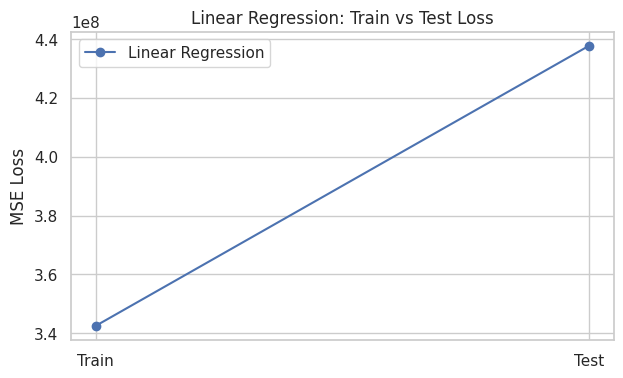

In [ ]:
# Plot: Linear Regression Loss Curve
plt.figure(figsize=(7, 4))
plt.plot(['Train', 'Test'], [train_mse, test_mse], marker='o', label='Linear Regression')
plt.title('Linear Regression: Train vs Test Loss')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()

### **2ND MODEL - XG BOOST**

In [ ]:
# 2ND - MODEL XG BOOST
# testing different models - more complex models

# Install XGBoost
!pip install xgboost


**Train XGBoost Regressor**

In [ ]:
# Initialize model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    objective='reg:squarederror'
)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

**Evaluate Performance**

In [ ]:
# Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, rmsle, r2, mae

train_mse_xgb, train_rmse_xgb, train_rmsle_xgb, train_r2_xgb, train_mae_xgb = evaluate(y_train, y_train_pred_xgb)
test_mse_xgb, test_rmse_xgb, test_rmsle_xgb, test_r2_xgb, test_mae_xgb = evaluate(y_test, y_test_pred_xgb)

accuracy_xgb = np.mean(np.abs((y_test - y_test_pred_xgb) / y_test) <= tolerance)

print("XGBOOST Performance Metrics\n")
print("\nMetric:", "\tMAE", "\t\tRMSE", "\t\tr2")
print("\nTrain:", train_mae_xgb, train_rmse_xgb, train_r2_xgb)
print("\nTest:", test_mae_xgb, test_rmse_xgb, test_r2_xgb)
print(f"\nApprox. Accuracy ±10%: {accuracy_xgb:.2%}\n")

XGBOOST Performance Metrics


Metric: 	MAE 		RMSE 		r2

Train: 10283.620628624998 13041.555807241399 0.9884455750761901

Test: 28843.376485999994 35568.0506752526 0.9158954880205687

Approx. Accuracy ±10%: 86.00%



**Feature Importance**

In [ ]:
feature_names = X.columns

# model coeffiecient
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

              Feature  Importance
1        Num_Bedrooms    0.364107
0         Square_Feet    0.294055
4          Year_Built    0.135491
6            Has_Pool    0.060226
2       Num_Bathrooms    0.048202
5          Has_Garden    0.028113
3          Num_Floors    0.022571
8      Location_Score    0.021896
9  Distance_to_Center    0.013573
7         Garage_Size    0.011767


**Train loss and Test loss line Graph**

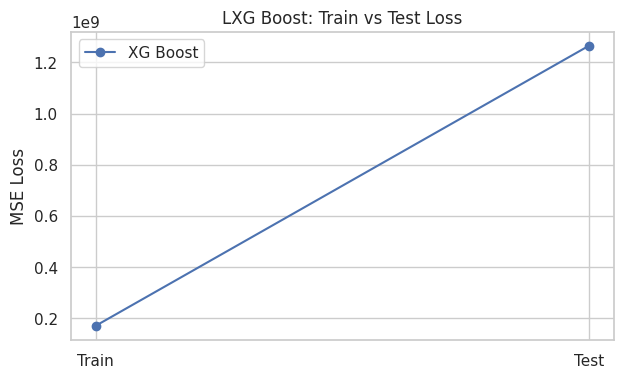

In [ ]:
# Plot: XG boost Regression Loss Curve
plt.figure(figsize=(7, 4))
plt.plot(['Train', 'Test'], [train_mse_xgb, test_mse_xgb], marker='o', label='XG Boost')
plt.title('LXG Boost: Train vs Test Loss')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()

**Observations of XG Boost**

1. Training performance improved a lot over linear regression

              Linear Regression    XGBoost

        RMSE  18,508               13,041

        R²    0.976                0.988


  - XGBoost fits the training data very well.

2. Test performance worsened: R² dropped

              Linear Regression    XGBoost

        RMSE  20,922               35,568

        R²    0.971              0.916
  - This is a sign of overfitting:
    - XGBoost memorized training patterns too well.
    - It struggles to generalize to unseen data.

3. RMSLE comparison
  - Training: slightly better

              Linear Regression    XGBoost

        RMSLE  0.0238              0.033

   - Testing: again indicates overfitting.

              Linear Regression    XGBoost

        RMSLE  0.077              0.045

### **3RD MODEL - Random Forest**

**Initialise and Train Model**

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100, # number of trees
    max_depth=None, # grow trees until all leaves are pure
    random_state=42, # a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it
    n_jobs=-1  # use all CPU cores
)

# Fit on training data
rf_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

**Evaluate Performance**

In [ ]:
train_mse_rf, train_rmse_rf, train_rmsle_rf, train_r2_rf, train_mae_rf = evaluate(y_train, y_train_pred_rf)
test_mse_rf, test_rmse_rf, test_rmsle_rf, test_r2_rf, test_mae_rf = evaluate(y_test, y_test_pred_rf)

accuracy_rf = np.mean(np.abs((y_test - y_test_pred_rf) / y_test) <= tolerance)

print("Random Forest Performance Metrics\n")
print("\nMetric:", "\tMAE", "\t\tRMSE", "\t\tr2")
print("\nTrain:", train_mae_rf, train_rmse_rf, train_r2_rf)
print("\nTest:", test_mae_rf, test_rmse_rf, test_r2_rf)
print(f"\nApprox. Accuracy ±10%: {accuracy_rf:.2%}")

Random Forest Performance Metrics


Metric: 	MAE 		RMSE 		r2

Train: 13942.106470530001 17570.896327846112 0.9790261885530056

Test: 41978.516931669976 51372.433225004126 0.8245475489854655

Approx. Accuracy ±10%: 74.00%


**Feature Importance**

In [ ]:
feature_importance_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance_rf)


              Feature  Importance
0         Square_Feet    0.377243
1        Num_Bedrooms    0.317946
4          Year_Built    0.185711
8      Location_Score    0.028961
7         Garage_Size    0.025023
9  Distance_to_Center    0.022699
2       Num_Bathrooms    0.016487
6            Has_Pool    0.012507
3          Num_Floors    0.007955
5          Has_Garden    0.005468


**TRAIN loss and TEST loss line graph**

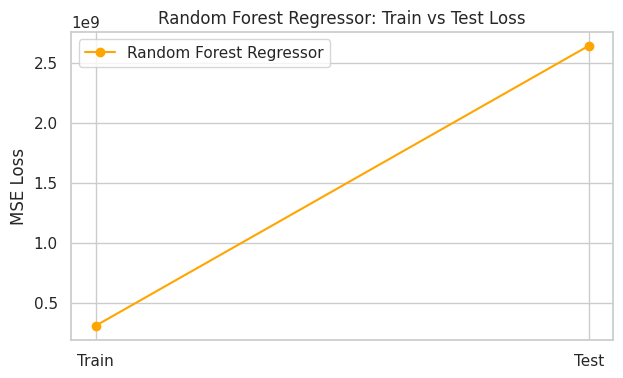

In [ ]:
# Plot: Random Forest Regressor Loss Curve
plt.figure(figsize=(7, 4))
plt.plot(['Train', 'Test'], [train_mse_rf, test_mse_rf], color='orange', marker='o', label='Random Forest Regressor')
plt.title('Random Forest Regressor: Train vs Test Loss')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()


**Observations of Random Forest**

1. Training performance -> slightly better fit than linear regression, slightly worse than XGBoost.
- Fits the training data very well, as expected.

              Linear Regression    XGBoost      Random Forest

        RMSE  18,508               13,041       17,571

        R²    0.976                0.988        0.979


  - XGBoost fits the training data very well.

2. Test performance: significantly worse than linear regression

              Linear Regression    XGBoost       Random Forest

        RMSE  20,922               35,568        51,372

        R²    0.971                0.916         0.825


3. RMSLE comparison
  - Training: worse on both models

              Linear Regression    XGBoost     Random Forest

        RMSLE  0.0238              0.033        0.0330

  - Testing: again indicates overfitting.
  

              Linear Regression    XGBoost   Random Forest

        RMSLE  0.077              0.045      0.1076


  - Strong overfitting — Random Forest is memorizing training patterns too much and generalizes poorly
  - The Train vs Test gap - Indicates model complexity is too high for the dataset size.

**Tune HyperParameters**
1. either leave the model at linear regression
2. tune hyperparameters for XG algorithm since better results; size of limit tree complexity, add regularization

In [ ]:
# Initialize tuned XGBoost model
xgb_tuned = xgb.XGBRegressor(
    max_depth=4,            # shallower trees reduce overfitting
    learning_rate=0.05,     # smaller learning rate for gradual learning
    n_estimators=800,       # more trees to compensate for low lr
    min_child_weight=3,     # prevent overfitting
    subsample=0.8,          # 80% of data per tree
    colsample_bytree=0.8,   # 80% of features per tree
    reg_alpha=0.2,          # L1 regularization
    reg_lambda=5,           # L2 regularization
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
xgb_tuned.fit(X_train, y_train)

# Predictions
y_train_pred_tune = xgb_tuned.predict(X_train)
y_test_pred_tune = xgb_tuned.predict(X_test)


In [ ]:
# evaluate performance
train_mse_xgb, train_rmse_xgb, train_rmsle_xgb, train_r2_xgb, train_mae_xgb = evaluate(y_train, y_train_pred_tune)
test_mse_xgb, test_rmse_xgb, test_rmsle_xgb, test_r2_xgb, test_mae_xgb = evaluate(y_test, y_test_pred_tune)

accuracy_xgb = np.mean(np.abs((y_test - y_test_pred_xgb) / y_test) <= tolerance)

print("XGBOOST Performance Metrics After Tuning\n")
print("\nMetric:", "\tMAE", "\t\tRMSE", "\t\tr2")
print("\nTrain:", train_mae_xgb, train_rmse_xgb, train_r2_xgb)
print("\nTest:", test_mae_xgb, test_rmse_xgb, test_r2_xgb)
print(f"\nApprox. Accuracy ±10%: {accuracy_xgb:.2%}\n")

XGBOOST Performance Metrics After Tuning


Metric: 	MAE 		RMSE 		r2

Train: 1515.5485558749976 2076.4100377094537 0.9997071024316969

Test: 27654.35565399999 33639.508847082325 0.9247687185454826

Approx. Accuracy ±10%: 86.00%



# **DEEP LEARNING**

[Guide To follow through](https://developers.google.com/machine-learning/guides/deep-learning-tuning-playbook/new-project)

**Research**
*   Accuracy as an evaluation metric
*   adjusted r2: relationship between independent & target



In [ ]:
# In the future -- Try out a deep learning model

### **Deployment**
*   Build a streamlit app for interactive predictions

**Create folder save it on local, two files:**
1. app.py
2. requirements.txt


        streamlit
        pandas
        scikit-learn
        joblib

In [ ]:
# CHOOSEN MODEL: LINEAR REGRESSION
# because error test and train is smaller compared to XGB and RF
import joblib

In [ ]:
# Save both model and scaler together
# joblib.dump(model, 'house_prices_model.pkl') - single

joblib.dump({'model': model, 'scaler': scaler}, 'house_prices_model.pkl')

['house_prices_model.pkl']

In [ ]:
#Download model
from google.colab import files
files.download('house_prices_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>